<a href="https://colab.research.google.com/github/NikhithaVarma/Guvi-Task7/blob/main/Assignment_12(Logistic_Regression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Social_Network_Ads.csv

This dataset contains information of users in a social network. Those informations are the user id the gender the age and the estimated salary. A car company has just launched their brand new luxury SUV. And we're trying to see which of these users of the social network are going to buy this brand new SUV And the last column here tells If yes or no the user bought this SUV we are going to build a model that is going to predict if a user is going to buy or not the SUV based on two variables which are going to be the age and the estimated salary. So our matrix of feature is only going to be these two columns. We want to find some correlations between the age and the estimated salary of a user and his decision to purchase yes or no the SUV.

**Step 1 | Data Pre-Processing**

Importing the Libraries

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

Importing the dataset

In [157]:
df=pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [158]:
df.shape

(400, 5)

In [159]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [160]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [161]:
#userid is not required here so drop that column
df.drop("User ID",inplace=True,axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [162]:
df.dtypes

Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [163]:
df=df.drop_duplicates()
df.shape

(380, 4)

In [164]:
#gender also has no impact for the prediction of purchasing a car, so drop the column
df.drop("Gender", axis=1, inplace=True)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


**EDA**

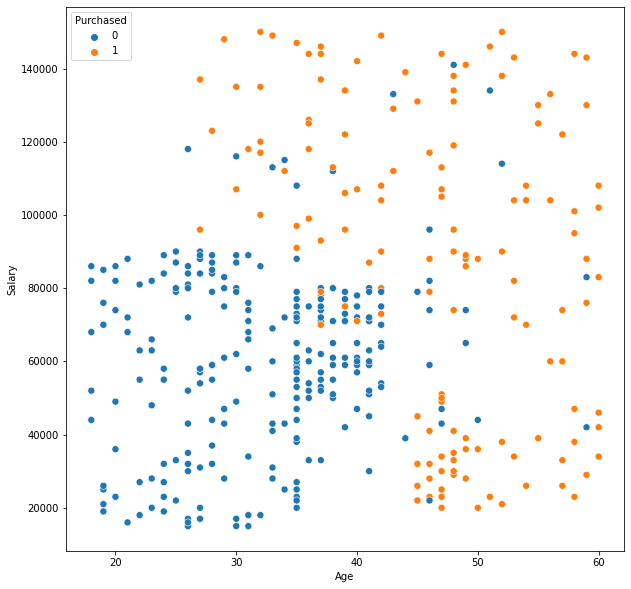

In [165]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=df, s=50)
plt.xlabel("Age")
plt.ylabel("Salary")
ax = plt.gca()

As the age and the estimated salary increasing=>chances of purchasing SUV increasing...there is a linear decision boundary so we can go with logistic regression without transformation

Splitting the dataset into the Training set and Test set

In [195]:
X = df[['Age', 'EstimatedSalary']].values # fts
y = df['Purchased'].values # target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25) # train- test split
X_train.shape

(285, 2)

In [196]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1])

Feature Scaling

In [197]:
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Step 2 | Logistic Regression Model**

Fitting Logistic Regression to the Training set

In [198]:
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(X_train_scaled,y_train) 


LogisticRegression()

**Step 3 | Predection**

In [199]:
y_pred=logistic_regression.predict(X_test_scaled)
logistic_regression.coef_
#y_pred

array([[2.11486312, 1.16025166]])

In [200]:
logistic_regression.intercept_

array([-0.89793958])

**Step 4 | Evaluating The Predection**

In [206]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Roc_Auc-score :",roc_auc_score(y_test,y_pred))


Accuracy : 0.8842105263157894
Roc_Auc-score : 0.8687683284457478


Making the Confusion Matrix

In [207]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[57,  5],
       [ 6, 27]])

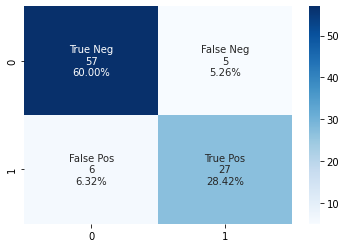

In [208]:
group_names = ["True Neg","False Neg","False Pos","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

Visualization

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


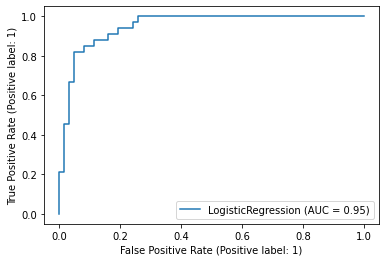

In [209]:
plot_roc_curve(logistic_regression, X_test_scaled, y_test)
